# Author - Aditya Singh

## Task 1 - Prediction using Supervised Machine Leaning

## GRIP @ The Sparks Foundation

This task aims to predict student's marks using linear regression. The idea behind this analysis is to predict the marks of students by their studying hours. Through this project we can determine if a student will do study x() hours per day so how much marks he\she will get.

This is a simple linear regression task as it involves just two variables.

In [1]:
#import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#loading Dataset using Pandas library.
url_path = "http://bit.ly/w-data"
df=pd.read_csv(url_path)

### Understanding the Data

In [3]:
#first 10 data points.
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking shape of Dataset.
print('shape of dataset is',df.shape)

shape of dataset is (25, 2)


In [5]:
#check for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Hence our data contains zero null values.

In [6]:
#getting basic information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#getting statistical meaning of dataset.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The key take-aways are :

Max Score: 95.0,   Min Score: 17.0,   Avg Score: 51.48

On an average, Students study around 5 hours

In [8]:
#getting co-relation between giving two variables.
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This method has given the correlation between study hours and student's marks. It is cleary visible that they are highly correlated because closer the value is to 1, which is 0.9761.

## Visualize the data to gain insights

<AxesSubplot:xlabel='Scores', ylabel='Count'>

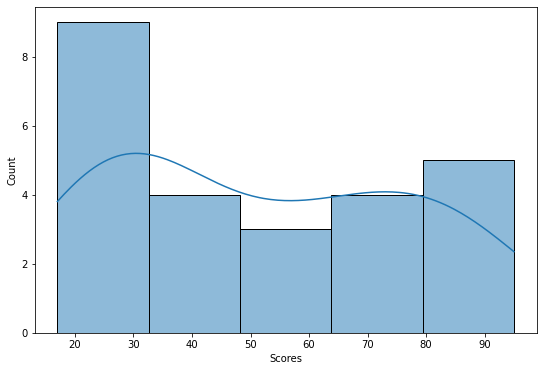

In [9]:
# checking distribution of our data using seaborn library.
plt.figure(figsize=(9,6))
sns.histplot(df['Scores'],bins=5,kde = True)

### Plotting the data.

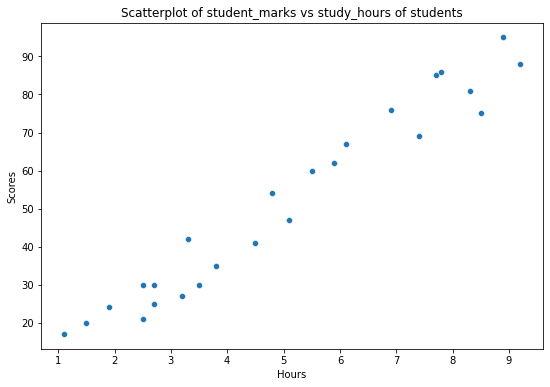

In [10]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title("Scatterplot of student_marks vs study_hours of students")
plt.show()

From the Scatter-Plot it is pretty clear that Linear Regression is the best Model for our data because our data is plotted linearly.

In [11]:
## Assign independent value and dependent values

X= df.drop("Scores", axis='columns')
y= df.drop("Hours", axis= 'columns')

In [12]:
print("Shape of X= ", X.shape)
print("Shape of y= ", y.shape)

Shape of X=  (25, 1)
Shape of y=  (25, 1)


In [13]:
#Splitting up Dataset into training and testing data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 51)
print("Shape of X_train=", X_train.shape)
print("Shape of _test=", X_test.shape)
print("Shape of y_train=", y_train.shape)
print("Shape of X_test=", y_test.shape)

Shape of X_train= (20, 1)
Shape of _test= (5, 1)
Shape of y_train= (20, 1)
Shape of X_test= (5, 1)


### Training the model 

In [14]:
#importing Linear regression model from Scikit learn library.
from sklearn.linear_model import LinearRegression

In [15]:
#y=m*X + c
regression=LinearRegression()

In [16]:
#fitting model with data values.
student_score = regression.fit(X_train, y_train)
print('Model is training is complete !')

Model is training is complete !


In [17]:
print('The cofficent of model is:-',regression.coef_) #c

The cofficent of model is:- [[9.56433743]]


In [18]:
print('The intercept of model is:-',regression.intercept_) #m

The intercept of model is:- [2.70197068]


## Prediction

In [19]:
regression.predict([[9.25]]) [0][0]. round(2)

91.17

### Testing Model 

In [20]:
#using 'predict' method, testing our model.
y_pred= regression.predict(X_test)

In [21]:
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

#### Comparing actual values with Predicted values

Creating new dataframe having both, predicted as well as actual values.

In [22]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns= ['Study_hours', 'Student_marks_original', 'Student_marks_predicted'])

,Study_hours,Student_marks_original,Student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


Text(0, 0.5, 'Percentage')

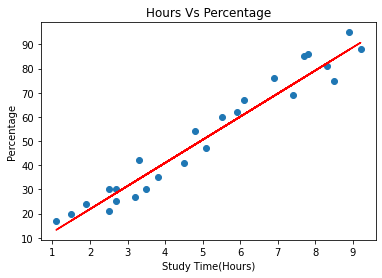

In [23]:
# plotting graph with linear equation
line = student_score.coef_*X+student_score.intercept_ # Linear Equation
plt.scatter(X,y)
plt.plot(X,line,color = 'red')
plt.title('Hours Vs Percentage')
plt.xlabel('Study Time(Hours)')
plt.ylabel('Percentage')

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

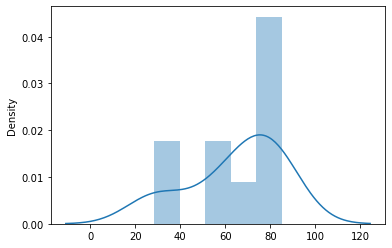

In [24]:
#check our distribution.
sns.distplot((y_test,y_pred),bins = 5)

### Fine-Tuning model

In [25]:
#finding Scores.
print("Score of our testing model is", regression.score(X_test, y_test)*100, "%")

Score of our testing model is 92.38518102278776 %


In [26]:
#finding Scores.
print("Score of our training model is", regression.score(X_train, y_train)*100, "%")

Score of our training model is 95.03247134839458 %


## Presenting Solution

In [27]:
# Testing the model with our own data and make prediction.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
prediction = regression.predict(test)
print('Number of hours = {}'.format(hours))
print('Predicted Socre = {}'.format(prediction[0]))

Number of hours = 9.25
Predicted Socre = [91.17209195]


### Evaluating Model.

In [28]:
from sklearn import metrics #importing matrics library for evaluation. 
print('Mean Absolute Error:-',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:-',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:-',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-2:-',metrics.r2_score(y_test,y_pred))

Mean Absolute Error:- 4.6422390298182545
Mean Squared Error:- 30.72122568166502
Root Mean Squared Error:- 5.542673153061167
R-2:- 0.9238518102278777


### Conclusion

We created a Simple Linear Regression Model to predict the scores of a student on a basis of the hours spent to study for the examination. Efficiency of our model is high, i.e., almost 95% which means that our model is working just fine.

### Thank you.